<img src ='Soal KNN.png'>

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, f1_score, precision_score,plot_confusion_matrix

In [121]:
tree = DecisionTreeClassifier(criterion='gini',max_depth=2)
tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [122]:
wine=pd.read_csv('white_wine.csv')
wine['label']=np.where(wine['quality']>6,1,0)
wine['alcohol'].fillna(wine['alcohol'].mean(),inplace=True)

In [123]:
X=wine[['density','alcohol']]
y=wine['label']

## Tanpa Scaling

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=2021)

In [125]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [126]:
y_train.value_counts(normalize=True)

0    0.819712
1    0.180288
Name: label, dtype: float64

In [127]:
tree.feature_importances_

array([0.63988816, 0.36011184])

In [128]:
y_pred = tree.predict(X_test)
accuracy_score(y_test,y_pred)

0.9326923076923077

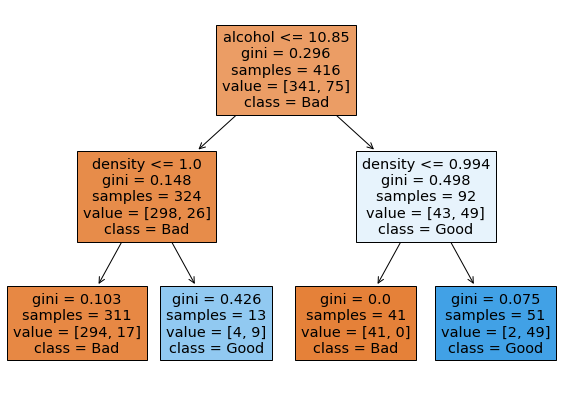

In [129]:
plt.figure(figsize=(10,7))
plot_tree(tree, feature_names = list(X.columns),class_names=['Bad','Good'],filled=True)
plt.show()

In [130]:
X_test.iloc[4]

density     0.9962
alcohol    12.4000
Name: 13, dtype: float64

In [131]:
y_test.iloc[4]

1

In [132]:
tree.predict_proba([X_test.iloc[4]])

array([[0.03921569, 0.96078431]])

# DECISION TREE COBA DI STANDARISASI BEBAS PAKE MINMAX ATAU SCALLER. NANTI DIBANDINGIN SAMA KNN. BOLEH DICOBA DI SESI 2

### coba baca xgboost extreme gradien boosting
### randomized search ==> buat cari hyperparameter tuning terbaik
### RandomizedSearch
### RandomizedSearchCV

ada n_iter nya

jadi merandom komposisi parameter yang dimasukkin

misal 10, jadi ada 10x merandom komposisi


### GridSearch
### GridSearchCV

gaada n_iternya

Semua komposisi dicobain 1 1 secara terstruktur


## Manual

In [133]:
outlook = ('sunny sunny cloudy sunny cloudy cloudy sunny').split()
temp = ('cold warm warm warm cold cold cold').split()
rout = ('in out in in in out out').split()
coat = ('no no no no yes yes yes').split()
data = pd.concat([pd.Series(outlook, name='Outlook'),
                  pd.Series(temp,name='Temperature'),
                  pd.Series(rout,name='Routinities'),
                  pd.Series(coat,name='Use coat/not')],axis=1)
data
# transportdf = pd.concat([pd.Series(transport, name='Transportation'),
#                        pd.Series([5,4,5,6,5,3,2,4,5,5,7,7,5,6,4,6,5,5,6,7,5,4,5,6,6,5,5,5,7,7], name='Study Hour')], axis=1)
# transportdf.head()

,Outlook,Temperature,Routinities,Use coat/not
0,sunny,cold,in,no
1,sunny,warm,out,no
2,cloudy,warm,in,no
3,sunny,warm,in,no
4,cloudy,cold,in,yes
5,cloudy,cold,out,yes
6,sunny,cold,out,yes


In [134]:
out = data.groupby('Outlook')
sun = out.get_group('sunny')
cloud = out.get_group('cloudy')

In [135]:
# Outlook
a=len(sun[sun['Use coat/not']=='yes'])
b=len(sun[sun['Use coat/not']=='no'])
c=len(cloud[cloud['Use coat/not']=='yes'])
d=len(cloud[cloud['Use coat/not']=='no'])
atas = -((a/(a+b))*np.log2(a/(a+b))+(b/(a+b))*np.log2(b/(a+b)))
bawah = -((c/(c+d))*np.log2(c/(c+d))+(d/(c+d))*np.log2(d/(c+d)))
weighed = ((a+b)/(a+b+c+d)*atas) + ((c+d)/(a+b+c+d)*bawah)
coat = -(((a+c)/(a+b+c+d))*np.log2((a+c)/(a+b+c+d))+((b+d)/(a+b+c+d))*np.log2((b+d)/(a+b+c+d)))
print('Entropy Coat:',coat)
print('atas :',atas)
print('bawah :',bawah)
print('weighed :',weighed)
print('Information Gain :',(coat-weighed))

Entropy Coat: 0.9852281360342515
atas : 0.8112781244591328
bawah : 0.9182958340544896
weighed : 0.8571428571428571
Information Gain : 0.12808527889139443


In [136]:
temp = data.groupby('Temperature')
cold = temp.get_group('cold')
warm = temp.get_group('warm')

In [137]:
cold

,Outlook,Temperature,Routinities,Use coat/not
0,sunny,cold,in,no
4,cloudy,cold,in,yes
5,cloudy,cold,out,yes
6,sunny,cold,out,yes


In [138]:
a=1
b=1
c=2
d=0
atas = -((a/(a+b))*np.log2(a/(a+b))+(b/(a+b))*np.log2(b/(a+b)))
bawah = -((c/(c+d))*np.log2(c/(c+d))+(d/(c+d))*np.log2(d/(c+d)))
weighed = ((a+b)/(a+b+c+d)*atas) + ((c+d)/(a+b+c+d)*0)
coat = -(((a+c)/(a+b+c+d))*np.log2((a+c)/(a+b+c+d))+((b+d)/(a+b+c+d))*np.log2((b+d)/(a+b+c+d)))
print('Entropy Coat:',coat)
print('atas :',atas)
print('bawah :',bawah)
print('weighed :',weighed)
print('Information Gain :',(coat-weighed))

Entropy Coat: 0.8112781244591328
atas : 1.0
bawah : nan
weighed : 0.5
Information Gain : 0.31127812445913283


<ipython-input-138-aedd5f8b8bc8>:6: RuntimeWarning: divide by zero encountered in log2
  bawah = -((c/(c+d))*np.log2(c/(c+d))+(d/(c+d))*np.log2(d/(c+d)))
<ipython-input-138-aedd5f8b8bc8>:6: RuntimeWarning: invalid value encountered in double_scalars
  bawah = -((c/(c+d))*np.log2(c/(c+d))+(d/(c+d))*np.log2(d/(c+d)))


In [139]:
data_dummy = pd.get_dummies(data,columns=['Outlook','Temperature','Routinities','Use coat/not'])
data_dummy['Coat']=('No No No No Yes Yes Yes').split()
data_dummy

,Outlook_cloudy,Outlook_sunny,Temperature_cold,Temperature_warm,Routinities_in,Routinities_out,Use coat/not_no,Use coat/not_yes,Coat
0,0,1,1,0,1,0,1,0,No
1,0,1,0,1,0,1,1,0,No
2,1,0,0,1,1,0,1,0,No
3,0,1,0,1,1,0,1,0,No
4,1,0,1,0,1,0,0,1,Yes
5,1,0,1,0,0,1,0,1,Yes
6,0,1,1,0,0,1,0,1,Yes


In [140]:
data_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Outlook_cloudy    7 non-null      uint8 
 1   Outlook_sunny     7 non-null      uint8 
 2   Temperature_cold  7 non-null      uint8 
 3   Temperature_warm  7 non-null      uint8 
 4   Routinities_in    7 non-null      uint8 
 5   Routinities_out   7 non-null      uint8 
 6   Use coat/not_no   7 non-null      uint8 
 7   Use coat/not_yes  7 non-null      uint8 
 8   Coat              7 non-null      object
dtypes: object(1), uint8(8)
memory usage: 240.0+ bytes


In [141]:
data_dummy.drop(['Use coat/not_no','Use coat/not_yes'],axis=1,inplace=True)
data_dummy

,Outlook_cloudy,Outlook_sunny,Temperature_cold,Temperature_warm,Routinities_in,Routinities_out,Coat
0,0,1,1,0,1,0,No
1,0,1,0,1,0,1,No
2,1,0,0,1,1,0,No
3,0,1,0,1,1,0,No
4,1,0,1,0,1,0,Yes
5,1,0,1,0,0,1,Yes
6,0,1,1,0,0,1,Yes


In [142]:
A=data_dummy[['Outlook_sunny','Outlook_cloudy','Temperature_warm','Temperature_cold','Routinities_out','Routinities_in']]
B=data_dummy['Coat']

In [143]:
A_train, A_test, B_train, B_test = train_test_split(A,B, test_size=0.2,random_state=2021)
tree.fit(A_train, B_train)
tree.feature_importances_


array([0.        , 0.76190476, 0.        , 0.23809524, 0.        ,
       0.        ])

In [144]:
B_pred = tree.predict(A_test)
accuracy_score(B_test,B_pred)

0.5

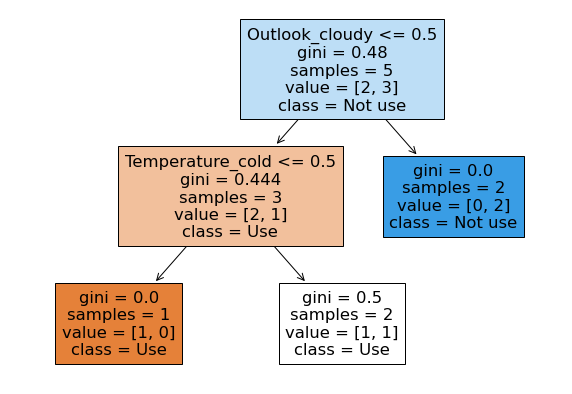

In [145]:
plt.figure(figsize=(10,7))
plot_tree(tree, feature_names = list(A.columns),class_names=['Use','Not use'],filled=True)
plt.show()